# <center>Online Retail Clustering</center>

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import plotly.offline as plt
import plotly.graph_objs as go

## Reading dataframe

In [5]:
# Pulling invoice data
df_retail = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Online-Retail-Clustering\.gitignore\OnlineRetail.csv')

In [6]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## Null value treatment

In [7]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
print('Number of na in customer id =' ,df_retail['CustomerID'].isna().sum())
print('Number of null in customer id =' ,df_retail['CustomerID'].isnull().sum())

Number of na in customer id = 135080
Number of null in customer id = 135080


In [9]:
df_retail['CustomerID'].fillna(0,inplace=True)
df_retail['Description'].fillna('No description',inplace=True)
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Mathematical implementation of K means clustering techinique
1.Pick K points as the initial centroids from the data set, either randomly or the first K.<br>
2.Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.<br>
3.Assign each data point to the closest centroid using the distance found in the previous step.<br>
4.Find the new centroid by taking the average of the points in each cluster group.<br>
5.Repeat iteration till the centroids don’t change.<br>


In [10]:
# Defining centroids
k = 5

# Filtering the columns required for clustering
df_retail_clust = df_retail.loc[:,['Quantity','UnitPrice']]

#Copying dataframe
data=df_retail_clust
data.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [11]:
# Storing the sample dataframe to determine the number of centroids
k_means = (data.sample(k, replace=False))    # store current means
k_means2 = pd.DataFrame()                    # store previous means
clusters = pd.DataFrame()    

In [12]:
while not k_means2.equals(k_means):
    # distance matrix (euclidean distance)
    cluster_count = 0
    for idx, k_mean in k_means.iterrows():
        clusters[cluster_count] = (data[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
        cluster_count += 1

    # update cluster
    data['MDCluster'] = clusters.idxmin(axis=1)

    # store previous cluster
    k_means2 = k_means
    k_means = pd.DataFrame()
    k_means_frame = data.groupby('MDCluster').agg(np.mean)
    k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

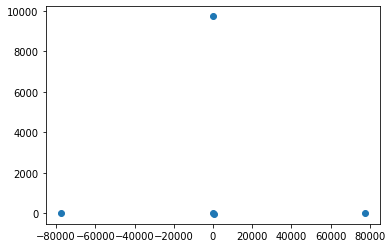

In [14]:
# plotting
import matplotlib.pyplot as plt 
plt.scatter(k_means.iloc[:,0],k_means.iloc[:,1])